# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">


In [115]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [116]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

## <div class="theme">  <b>Predicting Taxi Pickups in NYC</b> </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

### <div class="exercise"> <b> Question 1  [20 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.

**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Be sure to title your plot.

**1.3**. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. 

**1.4**. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this may be the case.  This will not be graded harshly, we just want you to think and communicate about the cause.


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [135]:
# read the file
df = pd.read_csv("data/nyc_taxi.csv", encoding='utf-8')

In [118]:
# split the data
# your code here
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data.head()

,TimeMin,PickupCount
1194,404.0,5.0
911,131.0,17.0
422,85.0,13.0
670,539.0,36.0
931,1266.0,46.0


**1.2 Generate a scatter plot of the training data points**


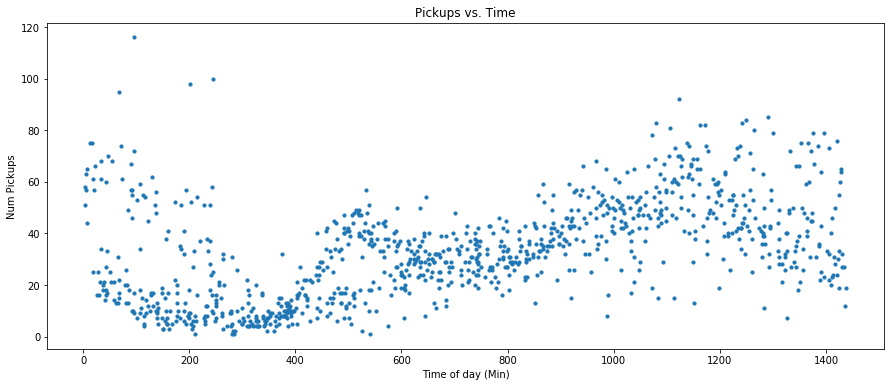

In [119]:
# Your code here
fig, ax = plt.subplots(1,1, figsize=(15,6))

# Plot best-fit line
x_train = np.array(train_data.TimeMin)
y_train = np.array(train_data.PickupCount)

ax.scatter(x_train, y_train, s=10, label='Training Data')

ax.set_xlabel('Time of day (Min)')
ax.set_ylabel('Num Pickups')
ax.set_title('Pickups vs. Time');

**1.3 In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result.**

*your answer here*
The number of Pickups is relatively low between 0 (12:00am) and 400 (6:40:am). Then there is an uptick corresponding to the morning rush hour to get to work or school. This continues until around 500 (8:20am), at which point there is a slight decrease since the morning rush hour eases up. At 600 (10am) the uptick begins again and continues throughout the day until around 1100 (6:20 pm), which makes sense since these are the prime daytime hours. At this point the data spreads out, but the bulk of the points begin to decrease until 1440 (midnight), which makes sense since there are less people taking cars at these late-night hours.  

**1.4 You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes...**

*your answer here*
This is between 8:20 and 9:10am. There could be a hole here because there is a sudden jump due to the morning commute. 

<hr>

### <div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary...** 

In [120]:
# your code here
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}
X_train = x_train.reshape(x_train.shape[0], 1)

# Make our lives easier by entering the k values from a list
k_list = [1, 10, 75, 250, 500, 750, 1000]

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 10: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
 75: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform'),
 250: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=250, p=2,
                     weights='uniform'),
 500: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform'),
 750: KNeighborsRegressor(algorit

**2.2  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set...**

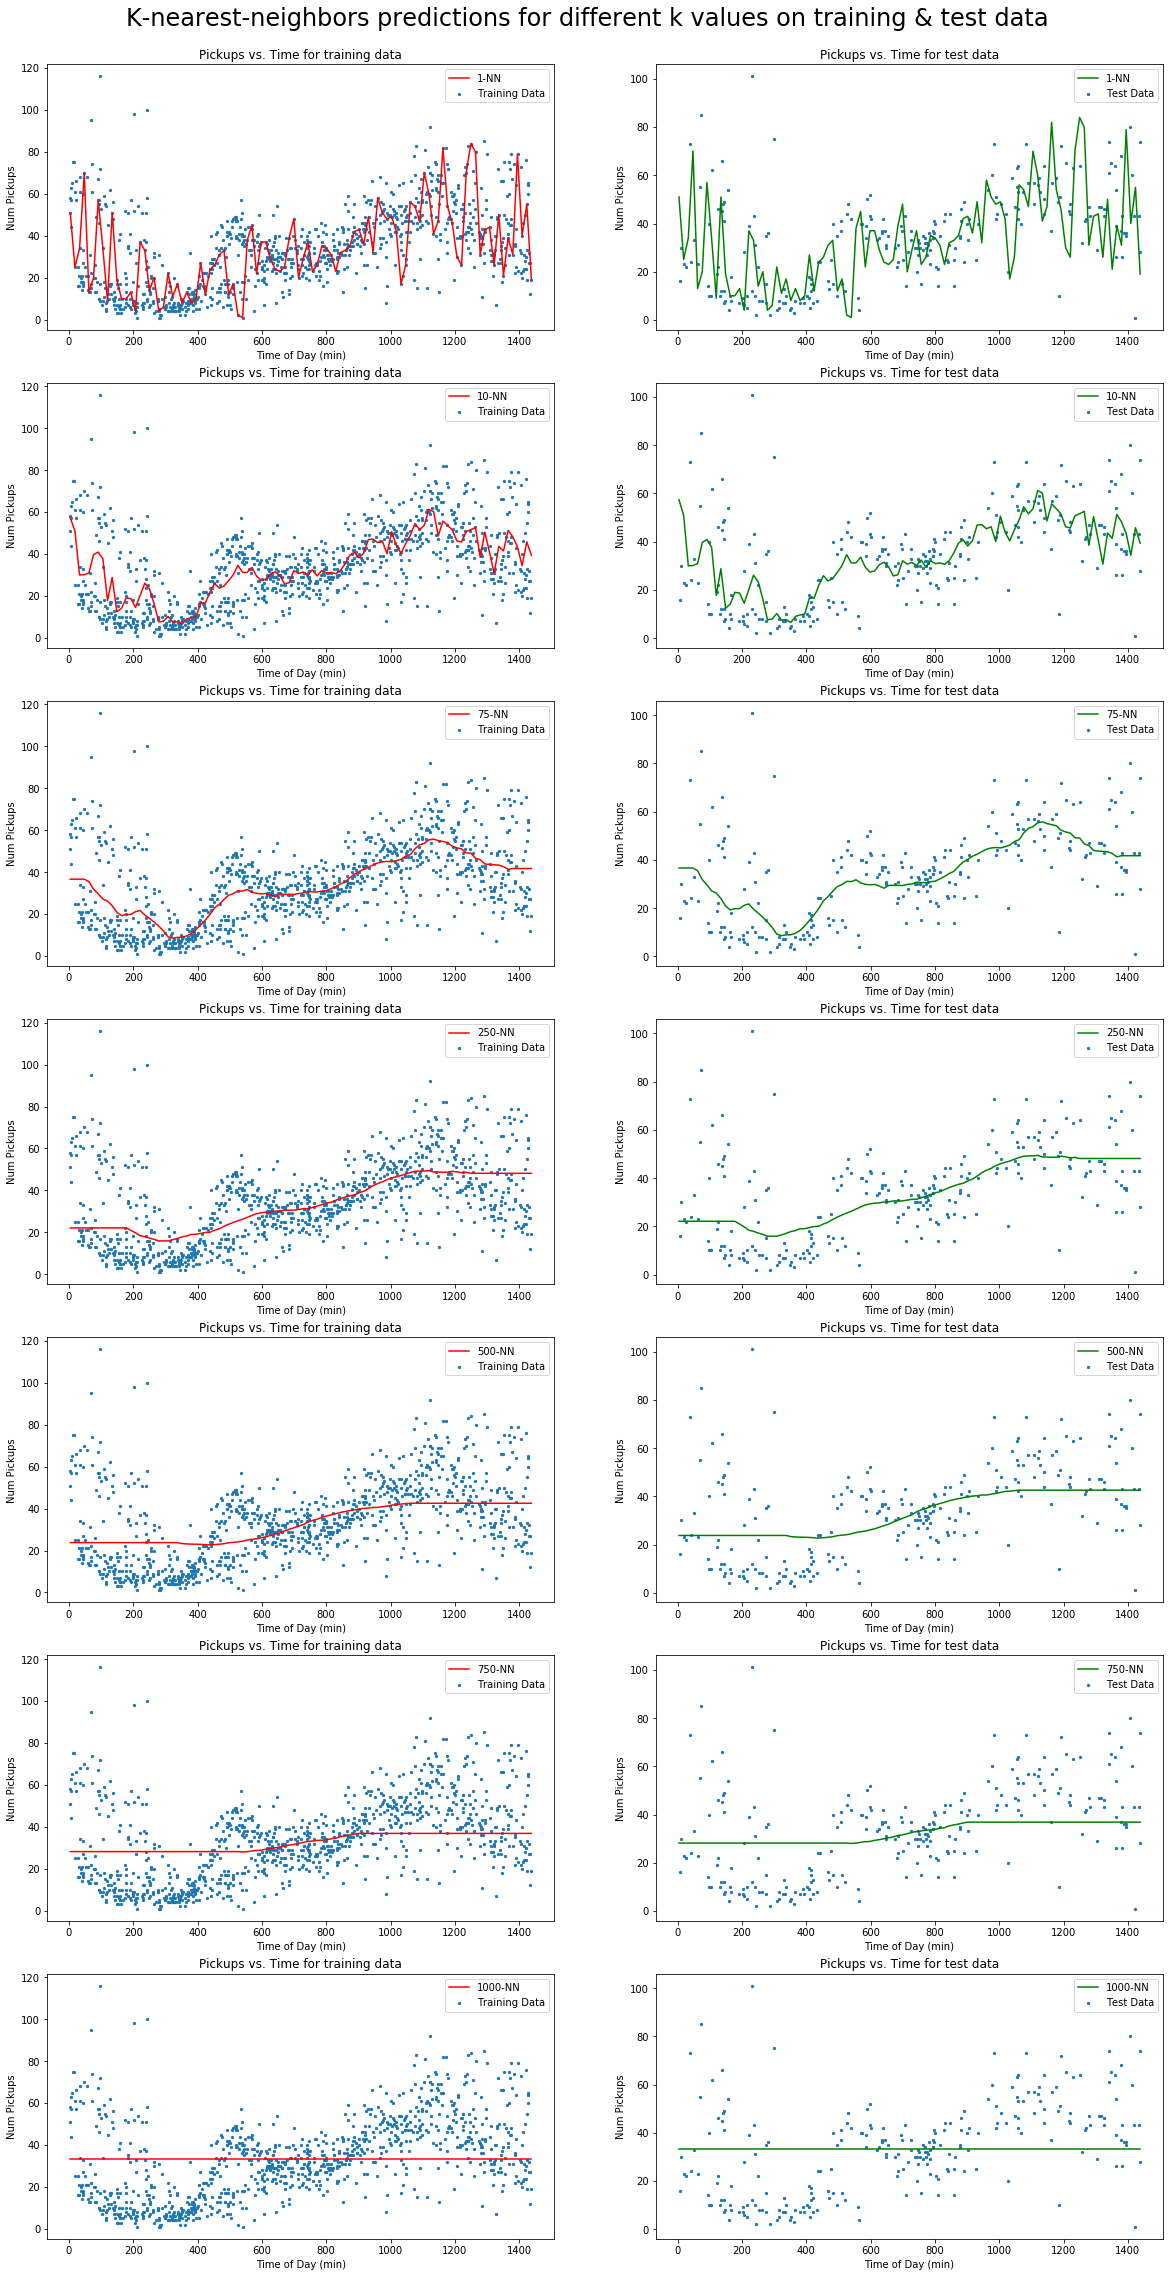

In [121]:
# your code here
# get test data
x_test = np.array(test_data.TimeMin)
y_test = np.array(test_data.PickupCount)

#make figure
fig, ax = plt.subplots(7,2, figsize=(20,40))
fig.suptitle('K-nearest-neighbors predictions for different k values on training & test data', size = 24, y=.9)
# counter variable
i = 0

ax[i]
for k, regressor in regdict.items():
    
    #plot for train data
    ax[i, 0].scatter(x_train, y_train, s=5, label='Training Data')

    xgrid = np.linspace(np.min(df.TimeMin), np.max(df.TimeMin), 100)

    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax[i, 0].plot(xgrid, predictions, color = 'red', label="{}-NN".format(k))
    
    ax[i, 0].set_xlabel('Time of Day (min)')
    ax[i, 0].set_ylabel('Num Pickups')
    ax[i, 0].set_title('Pickups vs. Time for training data')
    ax[i, 0].legend()
    
    # plot for test data
    ax[i, 1].scatter(x_test, y_test, s=5, label='Test Data')

    xgrid = np.linspace(np.min(df.TimeMin), np.max(df.TimeMin), 100)

    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax[i, 1].plot(xgrid, predictions, color = 'green', label="{}-NN".format(k))
    
    ax[i, 1].set_xlabel('Time of Day (min)')
    ax[i, 1].set_ylabel('Num Pickups')
    ax[i, 1].set_title('Pickups vs. Time for test data')
    ax[i, 1].legend()
    i += 1
    

**2.3 Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).**


In [122]:
# your code here
# reshape x_test
X_test = x_test.reshape(x_test.shape[0], 1)

r2_train = []
r2_test = []
for k, regressor in regdict.items():

    r2_train.append(regressor.score(X_train, y_train))
    r2_test.append(regressor.score(X_test, y_test))

r2_df = pd.DataFrame([r2_test, r2_train], ['Test', 'Training'], k_list)

# df = pd.DataFrame(list(zip(lst, lst2)), 
#                columns =['Name', 'val'])
r2_df.head()

,1,10,75,250,500,750,1000
Test,-0.418932,0.272068,0.390310,0.340341,0.270321,0.164909,-0.000384
Training,0.712336,0.509825,0.445392,0.355314,0.290327,0.179434,0.000000


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.**  

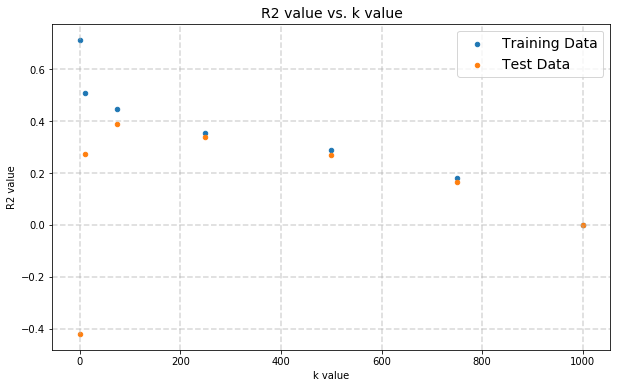

In [123]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.scatter(k_list, r2_train, s=20, label='Training Data')
ax.scatter(k_list, r2_test, s=20, label='Test Data')

ax.set_xlabel('k value')
ax.set_ylabel('R2 value')
ax.set_title('R2 value vs. k value', fontsize = 14)
ax.grid(True, lw=1.5, ls='--', alpha=0.5)
ax.legend(loc='best', fontsize=14);

**2.5 Discuss the results:**

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

*your answer here*
The R2 value begins at a high value (i.e. relatively close to 1), and as n increases to 1000, the R2 value decreases to 0 (since we are essentially just using the mean as the y prediction). 

2. What does an $R^2$ score of $0$ mean?  

*your answer here*
It means that your predictions are exactly the same as if you had just used the mean of the data as your prediction. 

3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

*your answer here*
A negative R2 value means that your predictions are worse than if you had just used the mean. On the test data, both for k=1 and k=1000, the R2 value was negative. 

4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  

*your answer here*
Yes. For training data, R2 strictly decreases as n increases. For test data, R2 increases initially, but then as n increaes to 1000 it too decreases to 0. 

5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?

*your answer here*
The best value of k is 75. I chose this because it is the highest combined value of R2 for the training and test data sets. Graphically, k=75 is the turning point where the R2 value on the test set begins to decrease. Both the training and test R2 values are similar (around .4) for k=75. 

6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).** ****

*your answer here*
When k is too small, the model is overfit, and it fluctuates too much due to individual outliers. When k is too large the model flattens out and isn't sensitive enough. When k=75 the model does a good job of tracking the data in a continuous fashion, without being thrown off by single outliers. 

<hr>

### <div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the estimates for the slope and intercept for the fitted linear model.  

**3.5**. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

**3.6**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable...**

In [124]:
# your code here
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
OLSModel = toyregr_sm.fit()

print(OLSModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.34e-62
Time:                        14:46:28   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.0

**3.2 Create a plot just like you did in 2.2 (but with fewer subplots)...** 

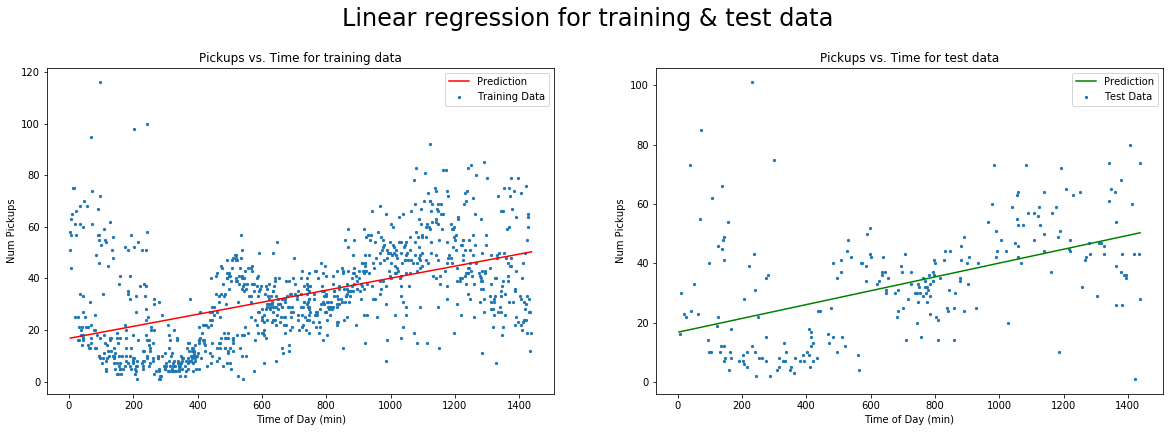

In [125]:
# your code here
# pull the beta parameters out from results_sm
beta0_sm = OLSModel.params[0]
beta1_sm = OLSModel.params[1]

#make figure
fig, ax = plt.subplots(1,2, figsize=(20,6))
fig.suptitle('Linear regression for training & test data', size = 24, y = 1.02)
    
#plot for train data
ax[0].scatter(x_train, y_train, s=5, label='Training Data')

xgrid = np.linspace(np.min(df.TimeMin), np.max(df.TimeMin), 100)
predictions1 = beta0_sm + beta1_sm*(xgrid)

ax[0].plot(xgrid, predictions1, color = 'red', label="Prediction")

ax[0].set_xlabel('Time of Day (min)')
ax[0].set_ylabel('Num Pickups')
ax[0].set_title('Pickups vs. Time for training data')
ax[0].legend()

#plot for test data
ax[1].scatter(x_test, y_test, s=5, label='Test Data')

xgrid = np.linspace(np.min(df.TimeMin), np.max(df.TimeMin), 100)
ax[1].plot(xgrid, predictions1, color = 'green', label="Prediction")

ax[1].set_xlabel('Time of Day (min)')
ax[1].set_ylabel('Num Pickups')
ax[1].set_title('Pickups vs. Time for test data')
ax[1].legend();


**3.3 Report the $R^2$ score for the fitted model on both the training and test sets.**


In [126]:
# your code here
print('R2 for training set: ', OLSModel.rsquared)

#calculate R2 for test data
predictions2 = beta0_sm + beta1_sm*(x_test)
prediction_error = np.sum((predictions2 - y_test)**2)
mean = np.mean(y_test)
mean_error = np.sum((mean - y_test)**2)
R2_test = 1 - prediction_error/mean_error
print('R2 for test set: ', R2_test)

R2 for training set:  0.2430260353189334
R2 for test set:  0.240661535615741


**3.4 Report the estimates for the slope and intercept for the fitted linear model.**

In [127]:
# your code here
print("Estimate for the slope is: ", beta1_sm, "(Pickups/minute)")
print("Estimate for the intercept is: ", beta0_sm, "(Pickups at midnight)")

Estimate for the slope is:  0.023335175692397344 (Pickups/minute)
Estimate for the intercept is:  16.750601427446817 (Pickups at midnight)


**3.5 Report the $95\%$ confidence intervals (CIs) for the slope and intercept.** 


In [128]:
# your code here
intervals = OLSModel.conf_int(alpha=.05)
print("We are 95% confident that our intercept is between {} and {}".format(intervals[0][0], intervals[0][1]))
print("We are 95% confident that our slope is between {} and {}".format(intervals[1][0], intervals[1][1]))

We are 95% confident that our intercept is between 14.67514134465737 and 18.826061510236265
We are 95% confident that our slope is between 0.02077697281825772 and 0.025893378566536968


**3.6 Discuss the results:**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.

*your answer here*
The test R2 score was .24, which is not nearly as good as the best R2 value obtained with k-NN regression, which was .39 for k = 75. This makes sense because the data is nonlinear, and so trying to predict values using a linear model is not going to be such a great fit. 

2. What does the sign of the slope of the fitted linear model convey about the data?  

*your answer here*
Since the slope is positive, this tells us that as you increase minutes (i.e. the day gets later) the model predicts number of pickups to increase.  


3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 


*your answer here*
We are 95% confident that the slope is between .02 and .026. Since this range does not contain 0, this suggest that the number of taxi pickups has a significant linear relationship with time of day. The value of the intercept doesn't matter at all here. 


4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  


*your answer here*
They would have the same midpoint, because it always centers on the observed intercept and slope of the model. However, they would have a higher width, to compensate for the increased degree of certainty (i.e. to be more certain of the range, we need a bigger range). 

5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

*your answer here*
Since x=0 and x=1440 both represent midnight, we should require that the model predict the same value of pickups for both x=0 and x=1440. This suggests that a linear model is not a good fit, since this constraint would require that the model be a horizontal line, which would be a very poor model indeed! (as it would predict the same value of pickups for all times of day)

## <div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or even one correct definition of an outlier).**


### <div class="exercise"><b> Question 4 [30 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of potential outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x`, `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  Your algorithm should select the `num_outliers` most extreme residuals from the linear regression model to predict, `dataset_y` from `dataset_x`.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Apply your function to the training data in order to identify 3 outliers.  Use `statsmodels` to create a Linear Regression model on the remaining training set data (with the 3 outliers removed), and store your model in the variable `OutlierFreeSimpleModel`.

**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?** 

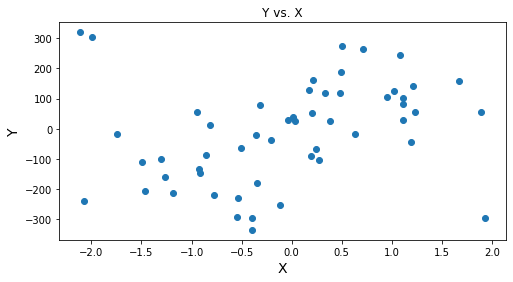

In [129]:
# read the data
# your code here
df_out = pd.read_csv('data/outliers_train.csv')

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.scatter(df_out.X, df_out.Y)
ax.set_xlabel("X", fontsize = 14)
ax.set_ylabel("Y", fontsize = 14)
ax.set_title("Y vs. X");

*your answer here*
There appears to be 3 outliers. Two of them are in the top left corner, and one is in the bottom right corner. The rest of the data seems to be contained within an imaginary rectangle oriented diagonally from bottom-left to top-right. 


**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.**



In [130]:
# your code here
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(df_out.X)
y = df_out.Y
# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y, X)
# do the fit and save regression info (parameters, etc) in results_sm
OutlierOLSModel = toyregr_sm.fit()
# pull the beta parameters out from results_sm
beta0 = OutlierOLSModel.params[0]
beta1 = OutlierOLSModel.params[1]
print(beta0, beta1)

-9.506264135716679 47.3554226118558


//anaconda3/envs/cs109a/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**4.3 You're given the knowledge ahead of time that there are 3 outliers...Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  

*your answer here*
There are 53 data points. We want to remove 3 of them, and calculate the LR coefficients for the remaining 50 points, and we want to do so for all possibilities of 50 points. We will thus need to calculate LR coefficients 53 choose 3, or 23426, times. 

**4.4  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data...**

In [131]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):

    # first find line of best fit for entire data set
    X = sm.add_constant(dataset_x)
    toyregr_sm = sm.OLS(dataset_y, X)
    OLSModel = toyregr_sm.fit()
    
    # get predictions list
    beta0_sm = OLSModel.params[0]
    beta1_sm = OLSModel.params[1]
    predictions = beta0_sm + beta1_sm*(dataset_x)
    
    # create list with residuals abs((predicted value - actual value))
    residuals = np.abs(predictions - dataset_y)
    
    # find indices of highest 3 elements of list
    outlier_indices = residuals.argsort()[-num_outliers:]
        
    return list(outlier_indices)

In [132]:
# get outliers and calculate outlier model
# find outliers and drop them from dataset
outliers = find_outliers_simple(df_out.X, df_out.Y, 3)
df_new = df_out.drop(outliers).copy()

# create outlier free model
X = sm.add_constant(df_new.X)
toyregr_sm = sm.OLS(df_new.Y, X)
OutlierFreeSimpleModel = toyregr_sm.fit()

**4.5 Create a figure with two subplots: the first is a scatterplot where the color of the points...**


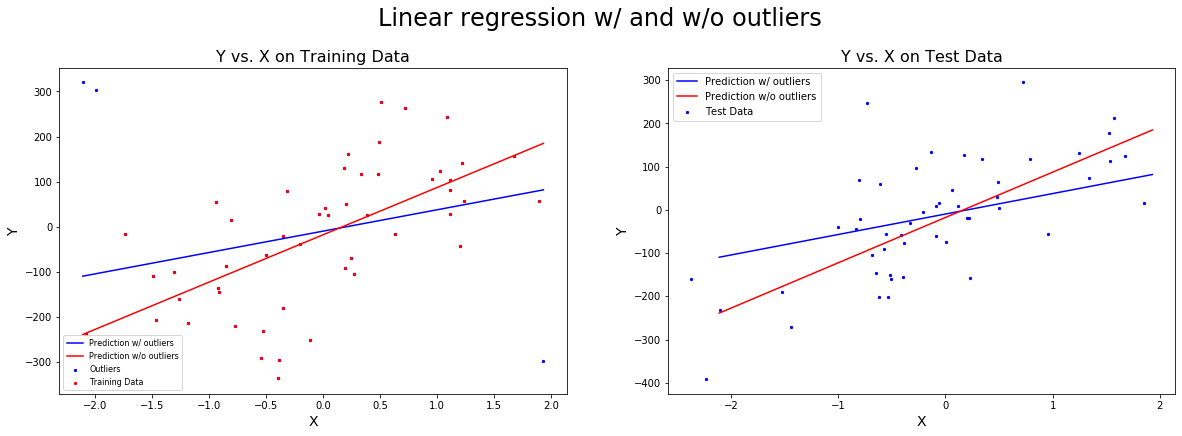

In [137]:
#make figure
fig, ax = plt.subplots(1,2, figsize=(20,6))
fig.suptitle('Linear regression w/ and w/o outliers', size = 24, y = 1.02)

#plot for training data
ax[0].scatter(df_out.X, df_out.Y, s=5, label='Outliers', color = 'blue')
ax[0].scatter(df_new.X, df_new.Y, s=5, label='Training Data', color = 'red')

#regression lines
beta0_updated = OutlierFreeSimpleModel.params[0]
beta1_updated = OutlierFreeSimpleModel.params[1]

xgrid = np.linspace(np.min(df_out.X), np.max(df_out.X), 100)
predictions = beta0 + beta1*(xgrid)
predictions_updated = beta0_updated + beta1_updated*(xgrid)

ax[0].plot(xgrid, predictions, color = 'blue', label="Prediction w/ outliers")
ax[0].plot(xgrid, predictions_updated, color = 'red', label="Prediction w/o outliers")

# make graph look nice
ax[0].set_xlabel('X', fontsize = 14)
ax[0].set_ylabel('Y', fontsize = 14)
ax[0].set_title('Y vs. X on Training Data', fontsize = 16)
ax[0].legend(loc = 'best', fontsize = 8)

# get test data
df_test = pd.read_csv('data/outliers_test.csv')

# plot for test data
ax[1].scatter(df_test.X, df_test.Y, s=5, label='Test Data', color = 'blue')

# regression lines
ax[1].plot(xgrid, predictions, color = 'blue', label="Prediction w/ outliers")
ax[1].plot(xgrid, predictions_updated, color = 'red', label="Prediction w/o outliers")

# make graph look nice
ax[1].set_xlabel('X', fontsize = 14)
ax[1].set_ylabel('Y', fontsize = 14)
ax[1].set_title('Y vs. X on Test Data', fontsize = 16)
ax[1].legend(loc = 'best', fontsize = 10);

*your answer here*
The model without outliers seems to fit the data better visually.

**4.6 Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**


In [134]:
# your code here
x_test = df_test.X
y_test = df_test.Y

#calculate R2 for test data using regression line with outliers
predictions = beta0 + beta1*(x_test)
prediction_error = np.sum((predictions - y_test)**2)
mean = np.mean(y_test)
mean_error = np.sum((mean - y_test)**2)
R2_test = 1 - prediction_error/mean_error
print('R2 for test set with outliers: ', R2_test)

#calculate R2 for test data using regression line without outliers
predictions2 = beta0_updated + beta1_updated*(x_test)
prediction_error2 = np.sum((predictions2 - y_test)**2)
R2_test = 1 - prediction_error2/mean_error
print('R2 for test set without outliers: ', R2_test)

R2 for test set with outliers:  0.34085656043405665
R2 for test set without outliers:  0.4529566870167583


The model based on the data without outliers yields a better R2 score, which confirms the visual intuition we had based on the plots above. 

**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers...**

*your answer here*
We could do the following process:
1) find all residuals.
2) remove any points whose residuals are drastically larger than the residuals of the other points.